<a href="https://colab.research.google.com/github/park-geun-hyeong/Dacon/blob/main/motion_keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from PIL import Image
import os
import cv2

from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, BatchNormalization, concatenate, Input
from tensorflow.keras.models import Model, Sequential

In [2]:
current_path=os.getcwd()
print(current_path)

/content


In [4]:
path='/content/drive/MyDrive/Dacon/Motion_keypoint/'

train=pd.read_csv(path+'train_df.csv')
submission=pd.read_csv(path+'sample_submission.csv')

In [5]:
train

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,neck_x,neck_y,left_palm_x,left_palm_y,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,001-1-1-01-Z17_A-0000001.jpg,1046.389631,344.757881,1041.655294,329.820225,1059.429507,334.484230,1020.117796,338.890539,1048.000000,343.000000,992.000000,394.000000,1054.000000,400.000000,956.000000,368.000000,1134.000000,371.000000,1003.497242,327.640085,1078.000000,341.000000,999.000000,570.000000,1046.000000,573.000000,995.000000,695.000000,1054.000000,698.000000,983.000000,820.000000,1042.000000,829.000000,1019.107277,373.766222,1013.137360,316.311695,1067.000000,335.000000,1019.484230,455.000000,1026.515770,514.054730,998.578836,826.718013,1063.204067,838.827465
1,001-1-1-01-Z17_A-0000003.jpg,1069.850679,340.711494,1058.608552,324.593690,1075.242111,325.593690,1041.422997,331.694815,1065.593682,333.968459,1010.000000,398.000000,1077.000000,386.000000,974.000000,398.000000,1144.000000,337.000000,1004.000000,346.000000,1094.000000,326.000000,1020.000000,557.000000,1069.000000,567.000000,1013.000000,583.000000,1072.000000,697.000000,1003.843781,678.797029,1042.000000,829.000000,1047.279440,362.031898,1017.383112,332.890539,1081.187380,323.000000,1046.953248,454.062706,1058.766231,508.797029,1002.265676,699.062706,1066.376234,841.499445
2,001-1-1-01-Z17_A-0000005.jpg,1084.475902,337.000008,1078.717997,323.757889,1095.648412,325.242119,1061.039884,329.351571,1086.461032,334.109461,1020.000000,381.000000,1083.000000,389.000000,984.000000,362.000000,1163.000000,372.000000,1027.507419,327.383120,1111.000000,340.000000,1016.000000,552.000000,1061.000000,556.000000,1018.000000,674.000000,1070.000000,696.000000,987.703151,788.867342,1044.000000,826.000000,1063.029716,358.679953,1042.374777,319.031541,1101.000000,334.000000,1044.538960,442.054730,1052.844144,495.890539,989.437847,808.757889,1066.071417,841.749554
3,001-1-1-01-Z17_A-0000007.jpg,1042.320047,361.452689,1037.907194,344.117804,1050.328382,353.913729,1016.844144,340.913737,1042.164191,359.351579,968.000000,392.000000,1010.000000,411.000000,941.812612,339.703151,1109.000000,441.000000,971.654931,328.648429,1066.812604,383.406310,972.000000,571.000000,1000.000000,559.000000,991.000000,700.000000,1110.000000,469.000000,991.406302,816.132650,1133.000000,591.000000,1007.302983,374.179405,981.842327,329.109461,1057.406318,372.461040,982.937294,458.109462,990.375124,507.624866,1001.305177,829.233767,1159.516499,599.389997
4,001-1-1-01-Z17_A-0000009.jpg,1058.046395,343.164191,1046.717997,331.703163,1058.132650,331.781079,1031.258806,338.593690,1049.812620,338.187380,997.000000,393.000000,1054.000000,395.000000,961.000000,423.000000,1132.000000,360.000000,988.676303,357.688297,1080.000000,337.000000,1000.000000,567.000000,1043.000000,570.000000,1017.000000,673.000000,1059.000000,701.000000,998.406302,784.570501,1040.000000,827.000000,1036.318945,366.195727,999.777421,349.829291,1069.648429,334.109461,1024.843791,453.687572,1034.391088,510.843791,998.625231,805.218921,1059.625956,839.765102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,642-2-4-31-Z148_E-0000023.jpg,637.251052,781.342260,1117.135818,370.667301,1097.123228,330.642200,1095.455539,355.657874,1083.364600,325.639021,1071.273662,329.391386,1065.456227,394.248144,1090.922902,451.649896,1029.689737,323.404243,972.402820,213.648438,963.353119,192.953986,982.

In [6]:
submission

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,neck_x,neck_y,left_palm_x,left_palm_y,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,649-2-4-32-Z148_A-0000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,649-2-4-32-Z148_A-0000003.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,649-2-4-32-Z148_A-0000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,649-2-4-32-Z148_A-0000007.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,649-2-4-32-Z148_A-0000009.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,786-3-5-41-Z94_E-0000023.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,786-3-5-41-Z94_E-0000025.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1597,786-3-5-41-Z94_E-0000027.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1598,786-3-5-41-Z94_E-0000029.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train.isna().sum().sum()

0

In [20]:
import glob

train_dir=path+'train_imgs/'
train_paths=train.iloc[:,0]
test_paths=glob.glob(path+'test_imgs/*.jpg')
print(len(train_paths),len(test_paths))


4195 1600


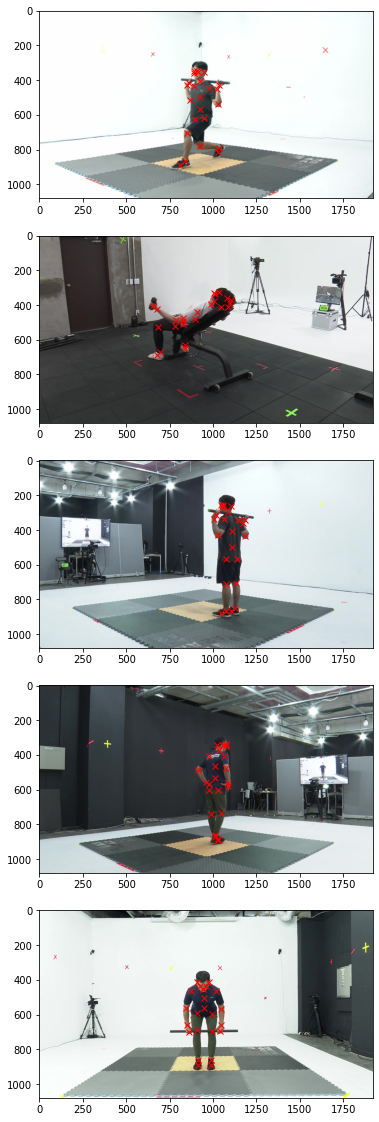

In [23]:
plt.figure(figsize=(40,20))
count=1

for i in np.random.randint(0,len(train_path), 5):
    plt.subplot(5,1,count)

    image_sample_path = train_dir + train_paths[i] 
    img=Image.open(image_sample_path)
    img_np=np.array(img)

    keypoint_sample=train.iloc[i,1:49]

    for j in range(0, len(keypoint.columns),2):
        plt.plot(keypoint_sample[j], keypoint_sample[j+1],'rx')
        plt.imshow(img_np)

    count+=1

In [25]:
train['path'] = train_dir + train_paths[i]
train.head()

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,neck_x,neck_y,left_palm_x,left_palm_y,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y,path
0,001-1-1-01-Z17_A-0000001.jpg,1046.389631,344.757881,1041.655294,329.820225,1059.429507,334.484230,1020.117796,338.890539,1048.000000,343.000000,992.0,394.0,1054.0,400.0,956.000000,368.000000,1134.0,371.0,1003.497242,327.640085,1078.000000,341.00000,999.0,570.0,1046.0,573.0,995.0,695.0,1054.0,698.0,983.000000,820.000000,1042.0,829.0,1019.107277,373.766222,1013.137360,316.311695,1067.000000,335.000000,1019.484230,455.000000,1026.515770,514.054730,998.578836,826.718013,1063.204067,838.827465,/content/drive/MyDrive/Dacon/Motion_keypoint/t...
1,001-1-1-01-Z17_A-0000003.jpg,1069.850679,340.711494,1058.608552,324.593690,1075.242111,325.593690,1041.422997,331.694815,1065.593682,333.968459,1010.0,398.0,1077.0,386.0,974.000000,398.000000,1144.0,337.0,1004.000000,346.000000,1094.000000,326.00000,1020.0,557.0,1069.0,567.0,1013.0,583.0,1072.0,697.0,1003.843781,678.797029,1042.0,829.0,1047.279440,362.031898,1017.383112,332.890539,1081.187380,323.000000,1046.953248,454.062706,1058.766231,508.797029,1002.265676,699.062706,1066.376234,841.499445,/content/drive/MyDrive/Dacon/Motion_keypoint/t...
2,001-1-1-01-Z17_A-0000005.jpg,1084.475902,337.000008,1078.717997,323.757889,1095.648412,325.242119,1061.039884,329.351571,1086.461032,334.109461,1020.0,381.0,1083.0,389.0,984.000000,362.000000,1163.0,372.0,1027.507419,327.383120,1111.000000,340.00000,1016.0,552.0,1061.0,556.0,1018.0,674.0,1070.0,696.0,987.703151,788.867342,1044.0,826.0,1063.029716,358.679953,1042.374777,319.031541,1101.000000,334.000000,1044.538960,442.054730,1052.844144,495.890539,989.437847,808.757889,1066.071417,841.749554,/content/drive/MyDrive/Dacon/Motion_keypoint/t...
3,001-1-1-01-Z17_A-0000007.jpg,1042.320047,361.452689,1037.907194,344.117804,1050.328382,353.913729,1016.844144,340.913737,1042.164191,359.351579,968.0,392.0,1010.0,411.0,941.812612,339.703151,1109.0,441.0,971.654931,328.648429,1066.812604,383.40631,972.0,571.0,1000.0,559.0,991.0,700.0,1110.0,469.0,991.406302,816.132650,1133.0,591.0,1007.302983,374.179405,981.842327,329.109461,1057.406318,372.461040,982.937294,458.109462,990.375124,507.624866,1001.305177,829.233767,1159.516499,599.389997,/content/drive/MyDrive/Dacon/Motion_keypoint/t...
4,001-1-1-01-Z17_A-0000009.jpg,1058.046395,343.164191,1046.717997,331.703163,1058.132650,331.781079,1031.258806,338.593690,1049.812620,338.187380,997.0,393.0,1054.0,395.0,961.000000,423.000000,1132.0,360.0,988.676303,357.688297,1080.000000,337.00000,1000.0,567.0,1043.0,570.0,1017.0,673.0,1059.0,701.0,998.406302,784.570501,1040.0,827.0,1036.318945,366.195727,999.777421,349.829291,1069.648429,334.109461,1024.843791,453.687572,1034.391088,510.843791,998.625231,805.218921,1059.625956,839.765102,/content/drive/MyDrive/Dacon/Motion_keypoint/t...


In [42]:
import tensorflow 

def TrainGenerator():
    for i in range(len(train)):
        img=tensorflow.io.read_file(train['path'][i])
        img=tensorflow.image.decode_jpeg(img,channels=3)
        img=tensorflow.image.resize(img,[180,320])
        target=train.iloc[i,1:49]

        yield(img,target)

train_datasets = tensorflow.data.Dataset.from_generator(TrainGenerator,(tensorflow.float32, tensorflow.float32),(tensorflow.TensorShape([180,320,3]), tensorflow.TensorShape([48]))) 
train_datasets = train_datasets.batch(32).prefetch(1)
    

In [34]:
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPool2D, ZeroPadding2D,Flatten, Dropout, Input, Activation, Convolution2D, MaxPooling2D

In [36]:
model=Sequential()

model.add(Conv2D(32,(3,3), padding='same',use_bias=False, input_shape=(180,320,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3), padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(96,(3,3), padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(48))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 180, 320, 32)      864       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 180, 320, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 320, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 320, 32)      9216      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 180, 320, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 320, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 160, 32)      

In [43]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(train_datasets, epochs=5, verbose=1)

Epoch 1/5
132/132 [==============================] - 1769s 13s/step - loss: 96199.1044 - mae: 203.7708
Epoch 2/5
132/132 [==============================] - 1787s 14s/step - loss: 18206.7417 - mae: 104.3543
Epoch 3/5
132/132 [==============================] - 1788s 14s/step - loss: 18049.1624 - mae: 103.7408
Epoch 4/5
132/132 [==============================] - 1760s 13s/step - loss: 17148.2121 - mae: 100.6432
Epoch 5/5
132/132 [==============================] - 1762s 13s/step - loss: 16539.9588 - mae: 98.7052


In [63]:
from tqdm import tqdm

x_test=[]

for test_path in tqdm(test_paths):
    img=tensorflow.io.read_file(test_path)
    img=tensorflow.image.decode_jpeg(img,channels=3)
    img=tensorflow.image.resize(img,[180,320])
    x_test.append(img)


100%|██████████| 1600/1600 [00:33<00:00, 47.88it/s]


In [64]:
x_test=tensorflow.stack(x_test,axis=0)
x_test.shape

TensorShape([1600, 180, 320, 3])

In [65]:
pred=model.predict(x_test)

In [66]:
submission.iloc[:,1:49]=pred

In [67]:
submission #399.050903	183.028809	407.162567	215.886383	377.329681

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,neck_x,neck_y,left_palm_x,left_palm_y,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,649-2-4-32-Z148_A-0000001.jpg,399.050903,183.028809,407.162567,215.886383,377.329681,219.352631,388.636047,215.567581,393.787079,230.780350,390.590240,231.341339,405.869690,240.855896,406.299530,214.357025,410.656525,210.218292,380.320587,217.780960,401.827576,221.174683,421.770355,235.281616,442.810608,237.469330,438.079102,233.292084,435.322418,243.116837,442.112976,298.284180,451.535553,313.842987,418.754303,226.720032,404.945709,225.083084,402.561981,222.409409,415.607330,266.120392,428.802765,262.942719,426.713837,335.496582,452.205322,328.695831
1,649-2-4-32-Z148_A-0000003.jpg,313.162506,143.355133,319.040466,166.544312,297.242645,173.419174,303.635620,168.417831,304.942749,179.847427,305.385956,180.697739,317.005646,188.588379,317.295380,166.059799,319.896332,163.424194,297.079071,169.567474,312.609009,169.970886,330.399597,186.141647,347.438629,187.263367,343.207855,182.216858,342.083649,187.865158,345.231140,230.774750,355.269928,244.226303,324.951111,175.197357,316.700470,180.589096,313.353485,174.643204,324.836578,206.585037,332.865234,209.024597,335.101349,264.134552,351.270020,261.361206
2,649-2-4-32-Z148_A-0000005.jpg,528.786926,247.369995,523.214783,283.776276,496.923126,273.247437,515.950684,288.524750,538.760193,296.840363,499.864136,295.595612,530.643494,322.791321,539.440796,291.138763,538.720337,291.693787,489.664459,303.455475,529.700256,316.540863,556.332642,317.921997,565.360474,294.680878,568.595398,318.626770,564.796997,311.286499,556.902405,405.774872,593.511597,426.232666,538.992981,307.658234,547.910400,271.541443,525.555969,293.167908,540.540161,349.122589,562.649109,325.574005,557.989624,446.070129,593.774475,408.732819
3,649-2-4-32-Z148_A-0000007.jpg,316.204193,145.469376,314.126892,167.650314,295.339935,166.451889,304.925385,170.080032,318.758026,177.813202,302.721008,175.474319,319.081512,189.384918,319.027557,174.077911,321.171478,170.567886,294.351532,173.987793,313.788116,182.926590,330.377960,187.662201,339.049561,179.522720,339.980316,187.028046,335.899170,186.995728,341.015320,238.630188,357.026886,247.377670,324.425842,184.586533,320.839050,161.695862,318.122345,175.156754,322.937805,210.610748,337.706055,199.188553,330.271088,260.692200,355.342316,247.639374
4,649-2-4-32-Z148_A-0000009.jpg,480.269104,221.262772,488.914001,260.312775,454.169525,261.924622,468.362335,260.027832,476.279572,276.997162,467.945801,277.890045,487.601227,289.729675,488.522980,257.530396,493.502960,254.726746,457.354584,265.137024,483.806946,269.590912,507.340759,282.896851,529.842407,283.559235,526.767212,281.293640,521.673584,292.258942,529.805725,361.084473,541.569946,379.682434,502.902374,273.288818,487.769623,266.182159,485.362274,267.238495,499.673950,320.633362,516.159180,312.915283,512.079041,403.741394,544.171570,389.924194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,786-3-5-41-Z94_E-0000023.jpg,-20.647415,16.848860,-8.459829,-17.428352,-49.058952,54.442646,-5.769330,-1.285765,-2.034796,59.121677,68.731995,-0.301404,28.258713,-1.369522,61.819691,-32.589012,71.003456,19.708927,-23.371140,12.331864,68.440468,67.263306,-27.104174,82.189774,27.144087,37.796234,76.141098,44.822849,22.313089,6.622823,-43.778263,87.820190,-28.326578,61.31547

In [68]:
submission.to_csv("dacon_motion_keypoint2.csv",index=False)

In [58]:
submission.isna().sum().sum()

0